<a href="https://colab.research.google.com/github/rochactivo-UPC/acc-Tools/blob/main/accTools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install eqsig

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 KB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eqsig: filename=eqsig-1.2.10-py3-none-any.whl size=38394 sha256=38ba53a10e6edbeed5fe5fd05978bbb20d0058c57debb58d12dc1244ad5edbe7
  Stored in directory: /root/.cache/pip/wheels/5f/95/97/aa4aeba7a78a0ae00c1a15d494269ca06e75530cf2b49c2f44
Successfully built eqsig




# Importar librerías

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import eqsig.single  # https://eqsig.readthedocs.io/en/latest/
import tkinter as tk
from tkinter import filedialog
import pandas as pd

**Importar Registro**

In [ ]:
'''
filename = ['señal 1_EW.txt', 'señal 1_NS.txt']

acc_x = np.loadtxt(filename[0],
                   skiprows=0,
                   usecols=(0, 1),
                   dtype=float)

acc_y = np.loadtxt(filename[1],
                   skiprows=1,
                   usecols=(0, 1),
                   dtype=float)

''' 

'''
design_spec = np.loadtxt('Espectro_diseño.txt',
                        skiprows=1,
                        usecols=(0, 1),
                        dtype=float)
'''

filename = ['E.txt', 'N.txt']

acc_x = np.loadtxt(filename[0],
                   skiprows=0,
                   usecols=False,
                   dtype=float)
fig = plt.figure()

acc_y = np.loadtxt(filename[1],
                   skiprows=0,
                   usecols=(0),
                   dtype=float)

#plt.plot(acc_x, acc_y, label=filename[0], color='red')
#df = pd.read_excel (r'/content/A_V_D_Tr_2475.xlsx')
#print (df)

g = 9.81 

scale_factor = 100

'''
amax_x = max(abs(acc_x[:, 0]))
amax_y = max(abs(acc_y[:, 0]))
amax = max(amax_x, amax_y)
total_time_x = max(acc_x[:, 0])
total_time_y = max(acc_x[:, 0])

# TODO: calculating real maximum acceleration

a_xy = np.sqrt(acc_x[:, 1] ** 2 + acc_y[:, 1] ** 2)
a_xy_max = max(a_xy)
'''


# Nueva sección

In [ ]:

dt = 0.01  # time step of acceleration time series
periods = np.linspace(0, 10, 1000)  # compute the response for 1000 periods between T=0s and 5s


record_x = eqsig.AccSignal(acc_x / 100, dt, label='X', smooth_freq_range=(0.1, 30), smooth_fa_freqs=None, verbose=0, response_period_range=(0.05, 8), response_times=None, ccbox=0)  # unit convertion to g
record_y = eqsig.AccSignal(acc_y / 100, dt, label='Y', smooth_freq_range=(0.1, 30), smooth_fa_freqs=None, verbose=0, response_period_range=(0.05, 8), response_times=None, ccbox=0)  # unit convertion to g

# Calc Espectro aceelración

record_x.generate_response_spectrum(response_times=periods,xi=0.05, min_dt_ratio=4)
record_y.generate_response_spectrum(response_times=periods,xi=0.05, min_dt_ratio=4)

# Calc espectro de desp y vel

record_x.generate_displacement_and_velocity_series(trap=True)
record_y.generate_displacement_and_velocity_series(trap=True)

# Calc Arias

arias_x = eqsig.im.calc_arias_intensity(record_x) # unit convertion to g
arias_y = eqsig.im.calc_arias_intensity(record_y) # unit convertion to g

# Calc dur significativa
sd_x = eqsig.im.calc_sig_dur(record_x, start=0.05, end=0.95, im=None, se=True)
bd_x = eqsig.im.calc_brac_dur(record_x, 0.1, se=True)

# eqsig.loader.save_signal(filename[0]+'_corr', record_x,0.01,filename[0])


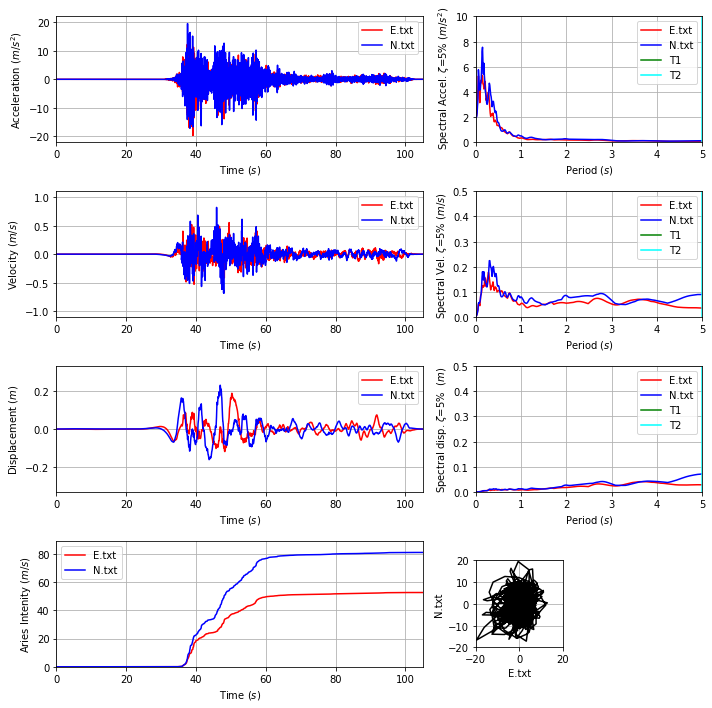

In [ ]:
#@title
# Figures

time_limit = 5
amax = 20
vmax = 1
dmax = 0.3


# fig, ((ax1, ax2), (ax3)) = plt.subplots(2, 1)

# creating grid for subplots
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

ax1 = plt.subplot2grid(shape=(4, 5), loc=(0, 3), colspan=2) # Esp acc
ax2 = plt.subplot2grid(shape=(4, 5), loc=(3, 3), colspan=1) # mov part
ax3 = plt.subplot2grid(shape=(4, 5), loc=(0, 0), colspan=3) # acc rec
ax4 = plt.subplot2grid(shape=(4, 5), loc=(3, 0), colspan=3) # Arias
ax5 = plt.subplot2grid(shape=(4, 5), loc=(1, 3), colspan=2) # Esp Vel
ax6 = plt.subplot2grid(shape=(4, 5), loc=(2, 3), colspan=2) # esp disp
ax7 = plt.subplot2grid(shape=(4, 5), loc=(1, 0), colspan=3) # reg vel
ax8 = plt.subplot2grid(shape=(4, 5), loc=(2, 0), colspan=3) # reg disp


# Time series - acc
ax3.set(xlabel='Time ($s$)', ylabel='Acceleration ($m/s^2$)')
ax3.set(xlim=[0, max(record_x.time)], ylim=[-amax*1.1, amax*1.1])
ax3.grid()
ax3.plot(record_x.time, record_x.values, label=filename[0], color='red')
ax3.plot(record_y.time, record_y.values, label=filename[1], color='blue')
ax3.legend()
ax3.legend(loc='best')

# Time series - Vel
ax7.set(xlabel='Time ($s$)', ylabel='Velocity ($m/s$)')
ax7.set(xlim=[0, max(record_x.time)], ylim=[-vmax*1.1, vmax*1.1])
ax7.grid()
ax7.plot(record_x.time, record_x.velocity, label=filename[0], color='red')
ax7.plot(record_y.time, record_y.velocity, label=filename[1], color='blue')
ax7.legend()
ax7.legend(loc='best')

# Time series - Disp
ax8.set(xlabel='Time ($s$)', ylabel='Displacement ($m$)')
ax8.set(xlim=[0, max(record_x.time)], ylim=[-dmax*1.1, dmax*1.1])
ax8.grid()
ax8.plot(record_x.time, record_x.displacement, label=filename[0], color='red')
ax8.plot(record_y.time, record_y.displacement, label=filename[1], color='blue')
ax8.legend()
ax8.legend(loc='best')

# Arias intensity
ax4.set(xlabel='Time ($s$)', ylabel='Aries Intenity ($m/s$)')
ax4.set(xlim=[0, max(record_x.time)], ylim=[0, 1.1*max(max(arias_x),max(arias_y))])
ax4.grid()
ax4.plot(record_x.time, arias_x, label=filename[0], color='red')
ax4.plot(record_y.time, arias_y, label=filename[1], color='blue')
ax4.legend()
ax4.legend(loc='best')

# Acc Response spectra
ax1.set(xlabel='Period ($s$)', ylabel=' Spectral Accel. $\zeta$=5% ($m/s^2$)')
ax1.set(xlim=[0, 5], ylim=[0, 10])
# ax1.set(xlim=[7.6, 8.4], ylim=[0, 0.02])
ax1.grid()
ax1.plot(record_x.response_times, record_x.s_a / g, label=filename[0], color='red')
ax1.plot(record_y.response_times, record_y.s_a / g, label=filename[1], color='blue')
# ax1.plot(design_spec[:,0], design_spec[:,1], label='Design Spec', color='black')
ax1.axvline(x = 6, color = 'green', label = 'T1')
ax1.axvline(x = 5, color = 'cyan', label = 'T2')
ax1.legend()
ax1.legend(loc='best')

# Vel spectrum
ax5.set(xlabel='Period ($s$)', ylabel='Spectral Vel. $\zeta$=5% ($m/s$)')
ax5.set(xlim=[0, 5], ylim=[0, 0.5])
ax5.grid()
ax5.plot(record_x.response_times, record_x.s_v / g, label=filename[0], color='red')
ax5.plot(record_y.response_times, record_y.s_v / g, label=filename[1], color='blue')
ax5.axvline(x = 6, color = 'green', label = 'T1')
ax5.axvline(x = 5, color = 'cyan', label = 'T2')
ax5.legend()
ax5.legend(loc='best')

# Disp spectrum
ax6.set(xlabel='Period ($s$)', ylabel='Spectral disp. $\zeta$=5%  ($m$)')
ax6.set(xlim=[0, 5], ylim=[0, 0.5])
ax6.grid()
ax6.plot(record_x.response_times, record_x.s_d / g, label=filename[0], color='red')
ax6.plot(record_y.response_times, record_y.s_d / g, label=filename[1], color='blue')
ax6.axvline(x = 6, color = 'green', label = 'T1')
ax6.axvline(x = 5, color = 'cyan', label = 'T2')
ax6.legend()
ax6.legend(loc='best')

# Particle movement
ax2.set(xlabel=filename[0], ylabel=filename[1])
#ax2.set(xlim=[-amax, amax], ylim=[-amax, amax])
ax2.set(xlim=[-20, 20], ylim=[-20, 20])
ax2.grid()
ax2.plot(record_x.values, record_y.values, label="N00W-N90W", color='black')
#ax2.arrow(0, 0, amax, amax_y, width=0.01, color='black')
#ax2.arrow(0, 0, -amax_x, -amax_y, width=0.01, color='black')
#ax2.legend() # esto no me sirve
#ax2.legend(loc='best') # Esto tampoco
ax2.set_aspect('equal', 'box')

#plt.savefig(filename[0][0:5] + '.tif')
plt.tight_layout()
plt.show()

Otra cosa

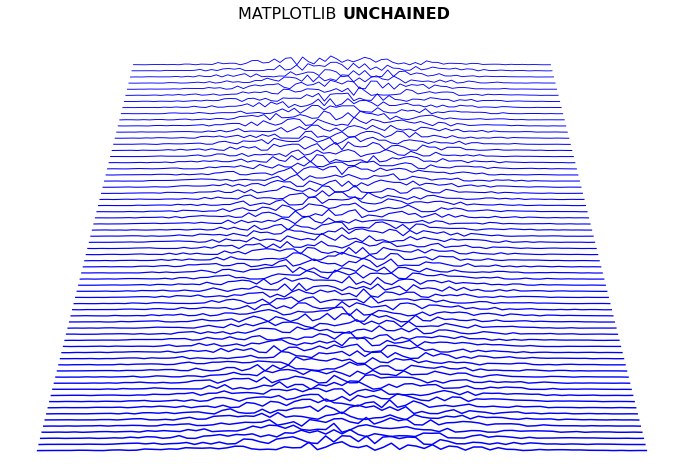

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure with black background
fig = plt.figure(figsize=(12, 8))

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)

# Generate random data
data = np.random.uniform(0, 1, (64, 75))
X = np.linspace(-1, 1, data.shape[-1])
G = 1.5 * np.exp(-4 * X ** 2)

# Generate line plots
lines = []
for i in range(len(data)):
    # Small reduction of the X extents to get a cheap perspective effect
    xscale = 1 - i / 200.
    # Same for linewidth (thicker strokes on bottom)
    lw = 1.5 - i / 100.0
    line, = ax.plot(xscale * X, i + G * data[i], color="b", lw=lw)
    lines.append(line)

# Set y limit (or first line is cropped because of thickness)
ax.set_ylim(-1, 70)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# 2 part titles to get different font weights
ax.text(0.5, 1.0, "MATPLOTLIB ", transform=ax.transAxes,
        ha="right", va="bottom", color="k",
        family="sans-serif", fontweight="light", fontsize=16)
ax.text(0.5, 1.0, "UNCHAINED", transform=ax.transAxes,
        ha="left", va="bottom", color="k",
        family="sans-serif", fontweight="bold", fontsize=16)


def update(*args):
    # Shift all data to the right
    data[:, 1:] = data[:, :-1]

    # Fill-in new values
    data[:, 0] = np.random.uniform(0, 1, len(data))

    # Update data
    for i in range(len(data)):
        lines[i].set_ydata(i + G * data[i])

    # Return modified artists
    return lines

# Construct the animation, using the update function as the animation director.
anim = animation.FuncAnimation(fig, update, interval=10)
plt.show()